## Preprocess your data using XCMS3 and export data files for feature-based molecular networking through GNPS

To follow this example tutorial, download the folder named <tt>'peak/AMG_Plant_subset'</tt> from: <br>
https://massive.ucsd.edu/ProteoSAFe/dataset.jsp?task=de2d18fd91804785bce8c225cc94a444

load libraries and GNPS export source function

In [1]:
source('customFunctions.R')
library(xcms)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min

Welcome to Bioconductor

    

Use socket based parallel processing on Windows systems

In [2]:
if (.Platform$OS.type == "unix") {
  register(bpstart(MulticoreParam(4)))
} else {
  register(bpstart(SnowParam(4)))
} 

### Load data

load all .mzXML files and define sample grouping

In [3]:
mzMLfiles <- paste0('AMG_Plant_subset/',list.files(path = 'AMG_Plant_subset/', pattern = ".mzXML$", recursive = TRUE))
s_groups <- rep("sample", length(mzMLfiles))
pheno <- data.frame(sample_name = sub(basename(mzMLfiles), pattern = ".mzML",replacement = "", fixed = TRUE),
                    sample_group = s_groups, stringsAsFactors = FALSE)

In [4]:
head(pheno)

sample_name,sample_group
10712_P4_RH3_01_521.mzXML,sample
10715_P4_RA4_01_415.mzXML,sample
10765_P4_RE9_01_482.mzXML,sample
11035_P4_RB4_01_431.mzXML,sample
13917_P4_RA10_01_423.mzXML,sample
14153_P4_RH8_01_526.mzXML,sample


read all raw data, including MS2 level

In [5]:
rawData <- readMSData(mzMLfiles, centroided. = TRUE, pdata = new("NAnnotatedDataFrame", pheno), mode = "onDisk")

create a base peak chromatogram (BPC) of your data for visual inspection

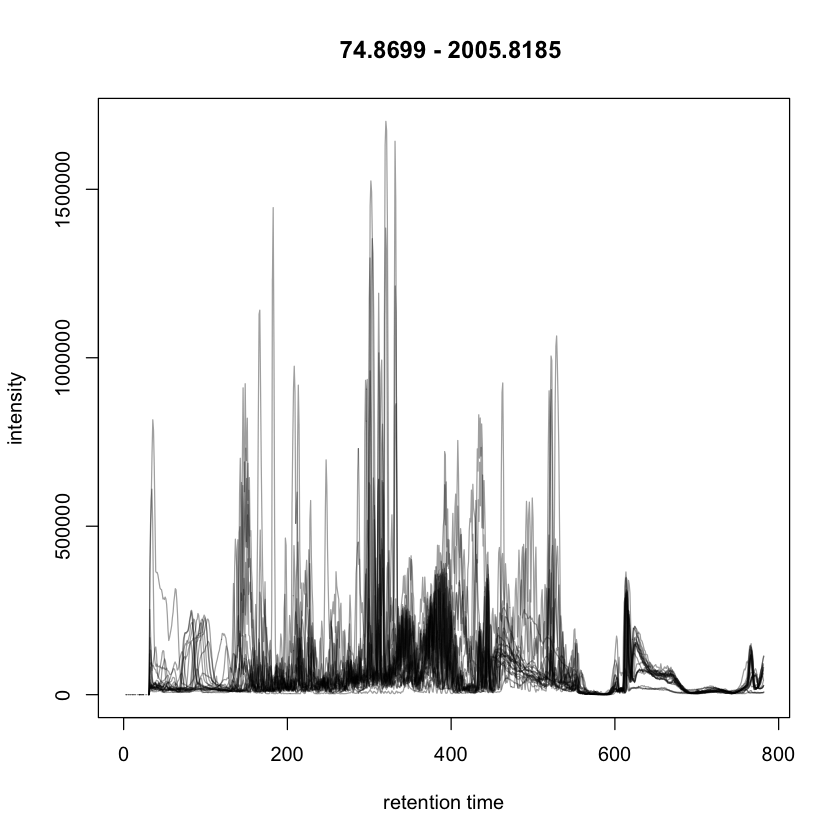

In [6]:
bpis <- chromatogram(rawData, aggregationFun = "max")
plot(bpis)

### Peak picking

define settings for the centWave peak detection.

In [7]:
cwp <- CentWaveParam(snthresh = 3, noise = 5000, peakwidth = c(5,30), ppm = 10)

perform peak picking

In [8]:
processedData <- findChromPeaks(rawData, param = cwp) 

R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send

get an overview of the detected peaks, using a heatmap

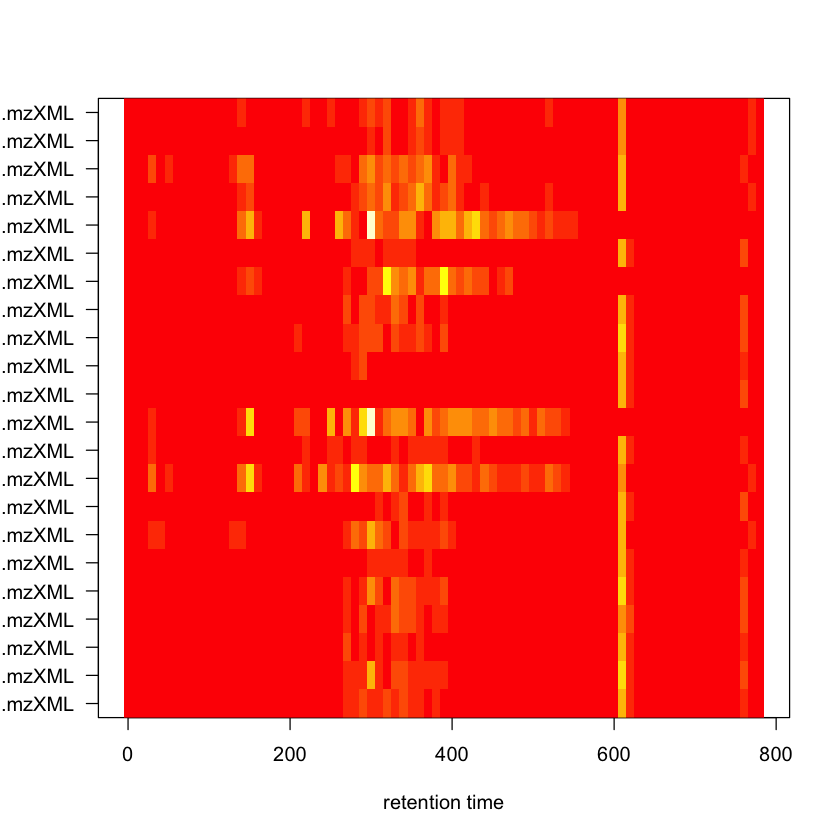

In [9]:
plotChromPeakImage(processedData, binSize = 10) 

### Retention time alignment

do a obiwarp alignment using the default settings

In [10]:
processedData <- adjustRtime(processedData, param = ObiwarpParam())

Sample number 11 used as center sample.
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror

plot the difference of adjusted to raw retention time

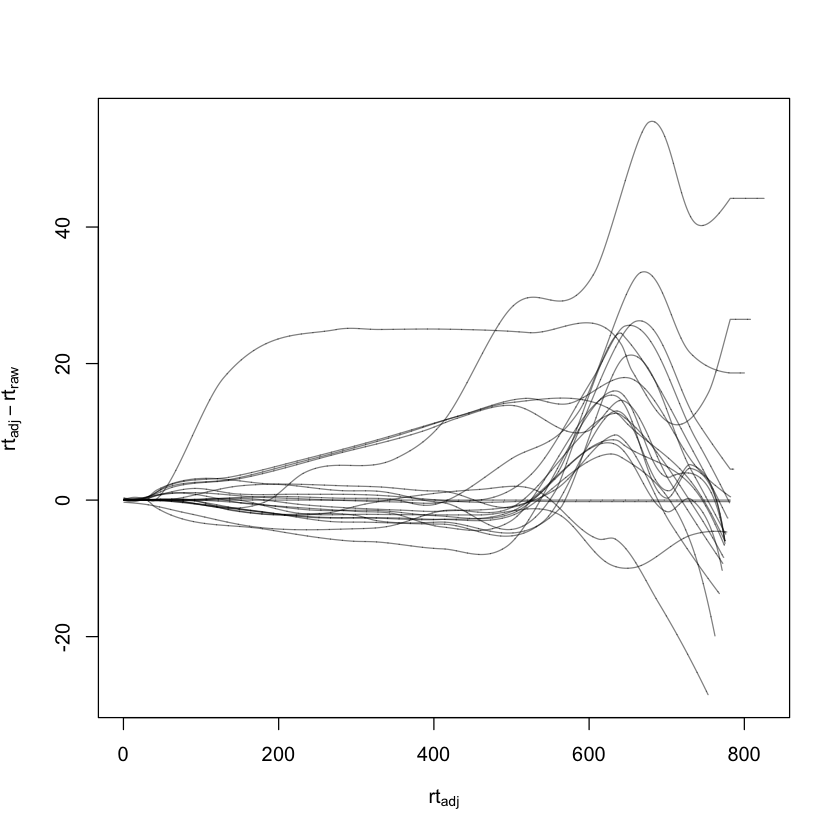

In [11]:
plotAdjustedRtime(processedData)

### Peak grouping

define the PeakDensityParam

In [12]:
pdp <- PeakDensityParam(sampleGroups = processedData$sample_group, minFraction = 0.10)
processedData <- groupChromPeaks(processedData, param = pdp) 

Processing 8792 mz slices ... OK


### Gap filling

fill in missing peaks

In [13]:
processed_Data <- fillChromPeaks(processedData)

Defining peak areas for filling-in .... OK
Start integrating peak areas from original files
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Inte

### Export data

#### export MS1 and MS2 features

export .mgf file <br>
all features, independent of whether they contain MS2 data or MS1 only will be saved to <tt>'ms2spectra_all.mgf'</tt>. This file can for example be used to do <i>in silico</i> structure prediction through [SIRIUS+CSI:FingerID](https://bio.informatik.uni-jena.de/software/sirius/):

In [14]:
## export the individual spectra into a .mgf file
filteredMs2Spectra <- featureSpectra(processedData, return.type = "Spectra")
filteredMs2Spectra@listData <- lapply(filteredMs2Spectra, clean, all = TRUE)
filteredMs2Spectra <- formatSpectraForGNPS(filteredMs2Spectra)

In [16]:
writeMgfData(filteredMs2Spectra, "ms2spectra_all.mgf")

export peak area quantification table <br>
a peak area quantification table contains features and respective per sample peak areas in columns. The file is saved to <tt>'xcms_all.txt'</tt>.

In [17]:
## get data
featuresDef <- featureDefinitions(processedData)
featuresIntensities <- featureValues(processedData, value = "into")

## generate data table
dataTable <- merge(featuresDef, featuresIntensities, by=0, all=TRUE)
dataTable <- dataTable[,!(names(dataTable) %in% c("peakidx"))]

In [18]:
head(dataTable)

Row.names,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,npeaks,sample,10712_P4_RH3_01_521.mzXML,⋯,10546_P4_RG11_01_515.mzXML,11111_P4_RB1_01_428.mzXML,11163_P4_RB11_01_439.mzXML,12262_P1_RE5_01_94.mzXML,13541_P4_RG3_01_506.mzXML,14563_P1_RE10_01_99.mzXML,15581_P2_RD4_01_203.mzXML,15623_P2_RC3_01_187.mzXML,16500_P2_RD8_01_209.mzXML,16501_P2_RD9_01_210.mzXML
FT0001,79.01876,79.01786,79.01983,632.6737,623.4913,671.0767,7,7,NA,⋯,NA,25194.60,41460.01,NA,NA,NA,37100.89,31792.34,NA,NA
FT0002,84.96011,84.95915,84.96119,632.3351,614.6725,672.1768,19,19,131536.75,⋯,133336.31,136480.93,123212.80,NA,128676.64,NA,146019.09,148656.29,142201.90,147074.26
FT0003,84.96008,84.95917,84.96123,768.7932,748.9986,816.4870,18,18,47386.26,⋯,44219.90,63143.97,63463.52,NA,56322.53,NA,33831.92,54578.64,41726.33,36886.44
FT0004,87.00476,87.00379,87.00583,631.4008,612.9404,671.0767,19,19,36743.51,⋯,39637.38,46997.92,46439.16,NA,37450.53,NA,40630.24,57949.78,42957.07,45581.79
FT0005,88.00500,88.00417,88.00608,629.6270,616.5360,668.8052,17,17,38299.19,⋯,32753.57,42393.10,44174.84,NA,39777.84,NA,29224.33,28941.75,22855.84,NA
FT0006,88.02374,88.02312,88.02502,768.6035,748.2793,815.6020,14,14,NA,⋯,52712.53,56453.99,40019.00,NA,NA,NA,38260.09,49078.86,NA,33403.81


In [19]:
write.table(dataTable, "xcms_all.txt", sep = "\t", quote = FALSE, row.names = FALSE)

#### export MS2 features only

export .mgf file <br>
This file can be submitted to GNPS [feature-based molecular networking](https://ccms-ucsd.github.io/GNPSDocumentation/featurebasedmolecularnetworking/):

In [20]:
## Select for each feature the Spectrum2 with the largest TIC.
filteredMs2spectra_maxTic <- endoapply(split(filteredMs2Spectra, mcols(filteredMs2Spectra)$feature_id), function(z) z[which.max(lapply(intensity(z), sum))])
filteredMs2spectra_maxTic <- unlist(filteredMs2spectra_maxTic)

In [22]:
writeMgfData(filteredMs2spectra_maxTic, "ms2spectra_maxTic.mgf")

export peak area quantification table <br>
the peak area quantification table contains features and respective per sample peak areas in columns. The file is saved to <tt>'xcms_onlyMS2.txt'</tt>. This file can be submitted to GNPS [feature-based molecular networking](https://ccms-ucsd.github.io/GNPSDocumentation/featurebasedmolecularnetworking/):

In [23]:
## filter data table to contain only peaks with MSMS DF[ , !(names(DF) %in% drops)]
filteredDataTable <- dataTable[which(dataTable$Row.names %in% filteredMs2Spectra@elementMetadata$feature_id),]

In [24]:
head(filteredDataTable)

,Row.names,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,npeaks,sample,10712_P4_RH3_01_521.mzXML,⋯,10546_P4_RG11_01_515.mzXML,11111_P4_RB1_01_428.mzXML,11163_P4_RB11_01_439.mzXML,12262_P1_RE5_01_94.mzXML,13541_P4_RG3_01_506.mzXML,14563_P1_RE10_01_99.mzXML,15581_P2_RD4_01_203.mzXML,15623_P2_RC3_01_187.mzXML,16500_P2_RD8_01_209.mzXML,16501_P2_RD9_01_210.mzXML
3,FT0003,84.96008,84.95917,84.96123,768.7932,748.9986,816.4870,18,18,47386.26,⋯,44219.90,63143.97,63463.52,NA,56322.53,NA,33831.92,54578.64,41726.33,36886.44
6,FT0006,88.02374,88.02312,88.02502,768.6035,748.2793,815.6020,14,14,NA,⋯,52712.53,56453.99,40019.00,NA,NA,NA,38260.09,49078.86,NA,33403.81
7,FT0007,88.02381,88.02301,88.02486,632.3018,613.8012,672.1768,19,19,106601.48,⋯,117296.73,143670.22,124281.27,NA,116959.66,NA,116065.87,134373.45,113570.83,111622.61
10,FT0010,97.01013,97.00943,97.01124,629.6270,611.2421,668.8052,19,19,104805.37,⋯,103491.04,116757.48,126878.14,NA,112133.41,NA,97458.39,104212.58,88544.07,92049.22
11,FT0011,97.01005,97.00962,97.01075,764.7314,751.1205,811.1670,13,13,37995.65,⋯,42610.06,44654.40,48893.62,NA,39757.19,NA,NA,NA,NA,NA
16,FT0016,98.51246,98.51178,98.51361,664.4330,612.9404,714.4675,76,19,406179.85,⋯,820176.67,1768152.28,962126.03,NA,524106.60,NA,270742.59,458656.61,556087.14,214308.59


In [25]:
write.table(filteredDataTable, "xcms_onlyMS2.txt", sep = "\t", quote = FALSE, row.names = FALSE)